<a href="https://colab.research.google.com/github/David-Henry78/Fifa_World_Cup_2022_Prediction/blob/main/Bitcoin_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Uncomment and run the following code once per session
# !pip install gdown

# import gdown

# url = "https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data/download?datasetVersionNumber=7"
# output = "bitcoin-data.zip"
# gdown.download(url, output, quiet=False)
# print("SUCCESS!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data/download?datasetVersionNumber=7
To: /content/bitcoin-data.zip
6.64kB [00:00, 6.11MB/s]

SUCCESS!


In [ ]:
with zipfile.ZipFile('/content/bitcoin-data', 'r') as zip_ref:
    zip_ref.extractall('/content')

BadZipFile: ignored

In [ ]:
bitcoin = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

# New Section

Text(0, 0.5, '$ Price')

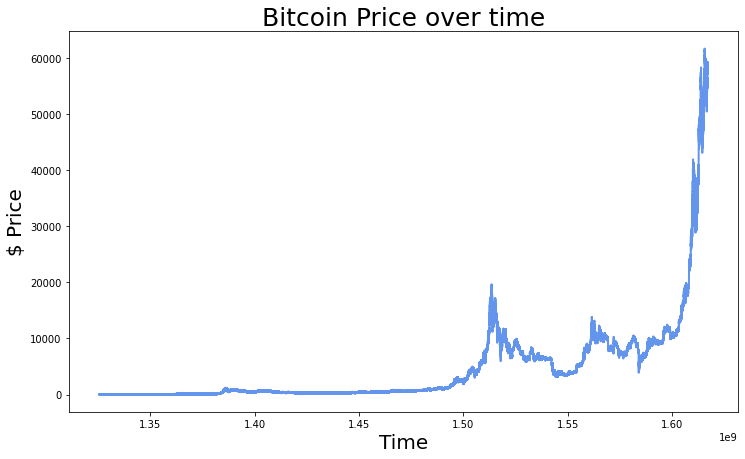

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Weighted_Price"], color='cornflowerblue', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

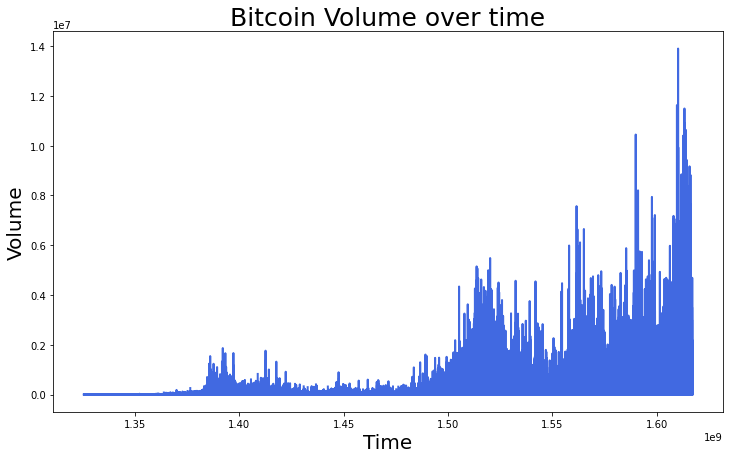

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [ ]:
bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [ ]:
bitcoin.dropna(inplace=True)

In [ ]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
bitcoin[required_features],
bitcoin[output_label],
test_size = 0.3
)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.9999993625518102

In [ ]:
future_set = bitcoin.shift(periods=30).tail(30)

bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
# future_set['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, 'Price (USD)')

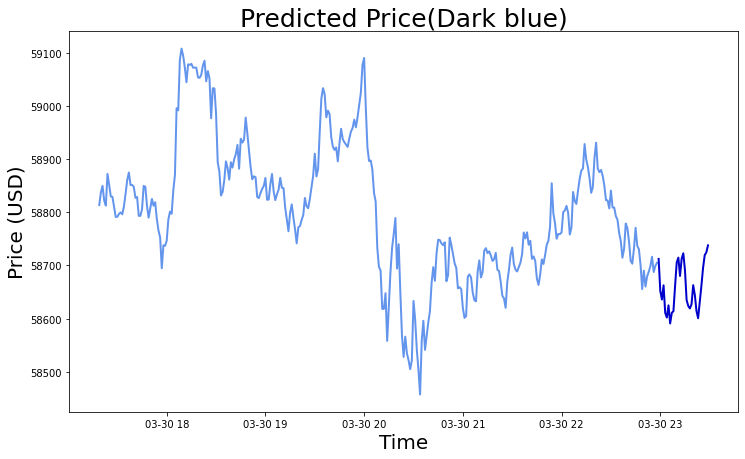

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Dates"][-400:-60], bitcoin["Weighted_Price"][-400:-60], color='cornflowerblue', lw=2)
plt.plot(future_set["Dates"], prediction, color='mediumblue', lw=2)
plt.title("Predicted Price(Dark blue)", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price (USD)", size=20)